### Problem 3

#### (a)

$$
y = X_1\beta_1 + X_2\beta_2 + e\\
\beta_1\sim\mathcal{N}(0, \sigma_1^2 I_{p1})\\
\beta_2\sim\mathcal{N}(0, \sigma_2^2 I_{p2})\\
e\sim\mathcal{N}(0, \sigma_e^2 I_n)
$$

Denote $X_1 = [X_{1,1},\cdots, X_{1,N} ]^T$ and $X_2 = [X_{2,1},\cdots, X_{2,N} ]^T$.

Denote $\beta = (\beta_1^T, \beta_2^T)^T$ and $X = (X_1, X_2) = [x_1, \cdots, x_N]^T$. Then we have 
$$
y = X \beta + e,
$$ and 
$$
y_n = \beta^T x_n + e_n.
$$

View $\beta_1$ and $\beta_2$ as the latent variable and $\theta$ as the model parameter. For convience, we redefine $\theta=\{\sigma_1^2, \sigma_2^2, \sigma_e^2\}$ by $\theta=\{a, b, c\}$, where 
$$
a = \frac{1}{\sigma_1^2}, \ b = \frac{1}{\sigma_2^2}, \ c = \frac{1}{\sigma_e^2}.
$$

The goal is to maximize the loglikelihood:
$$
\max_\theta \log P(y;\theta) = -\frac{1}{2}\left[
\log \left|\frac{1}{c}I_n + \frac{1}{a} X_1X_1^T + \frac{1}{b} X_2X_2^T\right| + y^T\left(\frac{1}{c}I_n + \frac{1}{a} X_1X_1^T + \frac{1}{b} X_2X_2^T\right)^{-1}y + N\log 2\pi
\right]
$$

Note that 
$$
\beta \sim\left(0,  \begin{pmatrix}
 a^{-1}I_{p_1} & 0\\
 0 & b^{-1}I_{p_2}
\end{pmatrix}\right)
$$
and 
$$
y|\beta \sim (X\beta, c^{-1}I_n),
$$
we have 
$$
y \sim \mathcal{N}\left(0, \frac{1}{c}I_n + \frac{1}{a} X_1X_1^T + \frac{1}{b} X_2X_2^T \right)
$$
$$
\beta|y \sim \mathcal{N}(\mu_r, \Sigma_r),
$$
where 
$$
\Sigma_r = \begin{pmatrix}
 aI_{p_1}+cX_1^TX_1 & cX_1^TX_2\\
 cX_2^TX_1 & bI_{p_2}+cX_2^TX_2
\end{pmatrix}^{-1},
$$
and 
$$
\mu_r = c \Sigma_r X^Ty 
$$

Moreover, we can derive:
$$
\beta_1|y \sim \mathcal{N}(\mu_1, \Sigma_1),
$$
and 
$$
\beta_2|y \sim \mathcal{N}(\mu_2, \Sigma_2),
$$
where
$$
\mu_1 = \Sigma_1 X_1^T(\frac{1}{b}X_2X_2^T + \frac{1}{c}I_n)^{-1} y, \ \Sigma_1 = [aI_{p_1} +  X_1^T(\frac{1}{b}X_2X_2^T + \frac{1}{c}I_n)^{-1}X_1]^{-1},
$$
$$
\mu_2 = \Sigma_2 X_2^T(\frac{1}{a}X_1X_1^T + \frac{1}{c}I_n)^{-1} y, \ \Sigma_2 = [bI_{p_2} +  X_2^T(\frac{1}{a}X_1X_1^T + \frac{1}{c}I_n)^{-1}X_2]^{-1}.
$$

We first implement the standard EM:

1\. Derive the complete-data log likelihood:
$$
 \log P(y, \beta;\theta) = \log P(y|\beta_;\theta) + \log P(\beta_1;\theta) + \log P(\beta_2;\theta)\\
 = \frac{N}{2}\log \frac{c}{2\pi} - \frac{c}{2}\sum_{n=1}^N(y_n - \beta^T x_{ n})^2  + \frac{p_1}{2} \log \frac{a}{2\pi} - \frac{a}{2}\beta_1^T \beta_1 + \frac{p_2}{2} \log \frac{b}{2\pi} - \frac{b}{2}\beta_2^T \beta_2
$$

2\. E-step: 
Evaluate 
$$
\mathbb{E}_{\beta|y;\theta_{old}}\left[\log P(y,\beta;\theta)\right]
$$
To evaluate above, we first evaluate:
$$
\mathbb{E}_{\beta|y;\theta}\left[(y_n - \beta^T X_{ n})^2 \right]
= y_n^2 - 2y_n \mu_r^T x_n + \mathrm{Tr}\left[x_n x_n^T(\mu_r \mu_r^T + \Sigma_r)\right]
$$
Then evaluate:
$$
\mathbb{E}_{\beta|y;\theta}\left[ \beta_1^T\beta_1\right] = \mathbb{E}_{\beta_1|y;\theta}\left[ \beta_1^T\beta_1\right] = \mu_1^T\mu_1 + \mathrm{Tr}[\Sigma_1],
$$
and
$$
\mathbb{E}_{\beta|y;\theta}\left[ \beta_2^T\beta_2\right] = \mathbb{E}_{\beta_2|y;\theta}\left[ \beta_2^T\beta_2\right] = \mu_2^T\mu_2 + \mathrm{Tr}[\Sigma_2].
$$

3\. M-step: Take derivatives w.r.t. $\theta$ to 0:
$$
a = \frac{p_1}{
\mu_1^T\mu_1 + \mathrm{Tr}[\Sigma_1]
}
$$
$$
b = \frac{p_2}{
\mu_2^T\mu_2 + \mathrm{Tr}[\Sigma_2]
}
$$
$$
c = \frac{N}{
\sum_{n=1}^N y_n^2 - 2y_n \mu_r^T x_n + \mathrm{Tr}\left[x_n x_n^T(\mu_r \mu_r^T + \Sigma_r)\right]
}
$$

Next we implement PX-EM for accelaration:
$$
y = \gamma X\beta + e.
$$
Define
$$
\theta = \{a, b, c\}, \ \theta^* = \{a^*, b^*, c^*\}\\
(a, b, c) = R(a^*, b^*, c^*, \gamma) = (\frac{a^*}{\gamma^2}, \frac{b^*}{\gamma^2}, c^*)
$$

At each round $t+1$:

1\. PX-E-step: 
Evaluate 
$$
Q(\theta^*, \gamma, \theta_{t}) = \mathbb{E}_{\beta|y;\theta_{t}}\left[\log P(y,\beta;\theta^*, \gamma)\right]\\
=\mathbb{E}_{\beta|y;\theta_{t}}\left[
  \frac{N}{2}\log \frac{c^*}{2\pi} - \frac{c^*}{2}\sum_{n=1}^N(y_n - \gamma\beta^T x_{ n})^2  + \frac{p_1}{2} \log \frac{a^*}{2\pi} - \frac{a^*}{2}\beta_1^T \beta_1 + \frac{p_2}{2} \log \frac{b^*}{2\pi} - \frac{b^*}{2}\beta_2^T \beta_2
\right]\\
= \frac{N}{2}\log \frac{c^*}{2\pi} - \frac{c^*}{2}\sum_{n=1}^N\mathbb{E}_{\beta|y;\theta_{t}}\left[(y_n - \gamma\beta^T x_{ n})^2\right]  + \frac{p_1}{2} \log \frac{a^*}{2\pi} - \frac{a^*}{2}\mathbb{E}_{\beta|y;\theta_{t}}\left[\beta_1^T \beta_1\right] + \frac{p_2}{2} \log \frac{b^*}{2\pi} - \frac{b^*}{2}\mathbb{E}_{\beta|y;\theta_{t}}\left[\beta_2^T \beta_2\right]
$$
where 
$$
\beta|y; \theta_t \sim \mathcal{N}\left(
\mu_r, \Sigma_r
\right),
$$
$$
\Sigma_r = \begin{pmatrix}
 a_tI_{p_1}+c_tX_1^TX_1 & c_tX_1^TX_2\\
 c_tX_2^TX_1 & b_tI_{p_2}+c_tX_2^TX_2
\end{pmatrix}^{-1},\ \mu_r = c_t \Sigma_r X^T Y.
$$
To evaluate above, we first evaluate:
$$
\mathbb{E}_{\beta|y;\theta_t}\left[(y_n - \gamma\beta^T X_{ n})^2 \right]
= y_n^2 - 2\gamma y_n \mu_r^T x_n + \gamma^2\mathrm{Tr}\left[x_n x_n^T(\mu_r \mu_r^T + \Sigma_r)\right]
$$
Then evaluate:
$$
\mathbb{E}_{\beta|y;\theta_t}\left[ \beta_1^T\beta_1\right] = \mathbb{E}_{\beta_1|y;\theta_t}\left[ \beta_1^T\beta_1\right] = \mu_1^T\mu_1 + \mathrm{Tr}[\Sigma_1],
$$
and
$$
\mathbb{E}_{\beta|y;\theta_t}\left[ \beta_2^T\beta_2\right] = \mathbb{E}_{\beta_2|y;\theta_t}\left[ \beta_2^T\beta_2\right] = \mu_2^T\mu_2 + \mathrm{Tr}[\Sigma_2].
$$

2\. PX-M-step:
$$
\theta^*_{t+1}, \gamma_{t+1} = \arg\max_{\theta^*, \gamma} Q(\theta^*, \gamma, \theta_t)
$$
Take derivatives w.r.t. $\{\theta^*, \gamma\}$ to 0:
$$
\gamma_{t+1} = \frac{y^TX\mu_r}{\mu_r^TX^TX\mu_r + \mathrm{Tr}[X^TX \Sigma_r]}
$$
$$
a^*_{t+1} = \frac{p_1}{
\mu_1^T\mu_1 + \mathrm{Tr}[\Sigma_1]
}
$$
$$
b^*_{t+1} = \frac{p_2}{
\mu_2^T\mu_2 + \mathrm{Tr}[\Sigma_2]
}
$$
$$
c^*_{t+1} = \frac{N}{
\sum_{n=1}^N y_n^2 - 2\gamma_{t+1}y_n \mu_r^T x_n + \gamma_{t+1}^2\mathrm{Tr}\left[x_n x_n^T(\mu_r \mu_r^T + \Sigma_r)\right]
}
$$

3\. PX-Reduction step:
$$
\theta_{t+1} = R(\theta_{t+1}^*, \gamma_{t+1})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint

In [2]:
class VCM3:
    '''
    three-variance-component model
    '''
    def __init__(self, X1, X2, y):
        self.X1 = X1
        self.X2 = X2
        self.X = np.concatenate((X1, X2), axis=1)
        self.y = y 
        self.p1 = X1.shape[1]
        self.p2 = X2.shape[1]
        self.n = y.shape[0]
        
    def mu_1_sigma_1(self, a, b, c):
        p1 = self.p1
        n = self.n
        X1 = self.X1
        X2 = self.X2
        y = self.y
        
        sigma_1 = np.linalg.inv(a*np.identity(p1) + X1.T@np.linalg.inv(X2@X2.T/b+np.identity(n)/c)@X1)
        mu_1 = sigma_1@X1.T@np.linalg.inv(X2@X2.T/b+np.identity(n)/c) @y
        
        return mu_1, sigma_1
    
    def mu_2_sigma_2(self, a, b, c):
        p2 = self.p2
        n = self.n
        X1 = self.X1
        X2 = self.X2
        y = self.y
        
        sigma_2 = np.linalg.inv(b*np.identity(p2) + X2.T@np.linalg.inv(X1@X1.T/a+np.identity(n)/c)@X2)
        mu_2 = sigma_2@X2.T@np.linalg.inv(X1@X1.T/a+np.identity(n)/c) @y
        
        return mu_2, sigma_2
    
    def mu_r_sigma_r(self, a, b, c):
        p1 = self.p1
        p2 = self.p2
        n = self.n
        X1 = self.X1
        X2 = self.X2
        X = self.X
        y = self.y  
        
        A = a*np.identity(p1) + c*X1.T@X1
        B = c*X1.T@X2
        C = c*X2.T@X1
        D = b*np.identity(p2) + c*X2.T@X2
        
        sigma_r = np.linalg.inv(\
                    np.concatenate((np.concatenate((A, B), axis=1), \
                                    np.concatenate((C, D), axis=1)), \
                                   axis=0))
        mu_r = c*sigma_r@X.T@y
        
        return mu_r, sigma_r
    
    def llh(self, a, b, c):
        p1 = self.p1
        p2 = self.p2
        n = self.n
        X1 = self.X1
        X2 = self.X2
        X = self.X
        y = self.y  
        
        tmp = np.identity(n)/c + X1@X1.T/a + X2@X2.T/b 
        sign, logdet = np.linalg.slogdet(tmp)
        
        t = logdet + y.T@np.linalg.inv(tmp)@y + n*np.log(2*np.pi)
        return -1/2*t    
    
    def solve_em(self, time_step, a0, b0, c0, tol=1e-6):
        p1 = self.p1
        p2 = self.p2
        n = self.n
        X = self.X
        y = self.y
        
        llhs = []
        llhs.append(self.llh(a0, b0, c0))
        a, b, c = a0, b0, c0
        for t in range(time_step):
            mu_1, sigma_1 = self.mu_1_sigma_1(a, b, c)
            mu_2, sigma_2 = self.mu_2_sigma_2(a, b, c)
            mu_r, sigma_r = self.mu_r_sigma_r(a, b, c)
            a = p1/(mu_1.T@mu_1 + np.trace(sigma_1))
            b = p2/(mu_2.T@mu_2 + np.trace(sigma_2))
            c = n/(np.linalg.norm(y-X@mu_r)**2 + np.trace(X.T@X@sigma_r))

            llhs.append(self.llh(a, b, c))
            if llhs[-1]-llhs[-2] < tol:
                break
        return a, b, c, llhs
    
    def solve_pxem(self, time_step, a0, b0, c0, tol=1e-6):
        p1 = self.p1
        p2 = self.p2
        n = self.n
        X = self.X
        y = self.y
        
        llhs = []
        llhs.append(self.llh(a0, b0, c0))
        a, b, c = a0, b0, c0
        for t in range(time_step):
            mu_1, sigma_1 = self.mu_1_sigma_1(a, b, c)
            mu_2, sigma_2 = self.mu_2_sigma_2(a, b, c)
            mu_r, sigma_r = self.mu_r_sigma_r(a, b, c)
            
            gamma = (y.T@X@mu_r)/(mu_r.T@X.T@X@mu_r + np.trace(X.T@X@sigma_r))
            a = p1/(mu_1.T@mu_1 + np.trace(sigma_1))
            b = p2/(mu_2.T@mu_2 + np.trace(sigma_2))
            c = n/(np.linalg.norm(y-gamma*X@mu_r)**2 + (gamma**2)*np.trace(X.T@X@sigma_r))
            
            # reduction
            a = a/gamma**2
            b = b/gamma**2
            
            llhs.append(self.llh(a, b, c))
            if llhs[-1]-llhs[-2] < tol:
                break
        return a, b, c, llhs        

In [3]:
df = pd.read_csv('../data/data_vc3.txt', delimiter=' ')
y = df.y.values
X1 = df.iloc[:,1:501].values
X2 = df.iloc[:,501:502+500].values

In [ ]:
model = VCM3(X1, X2, y)
a_em, b_em, c_em, lhs_em = model.solve_em(2000000, 1, 1, 1)
a_pxem, b_pxem, c_pxem, lhs_pxem = model.solve_pxem(2000000, 1, 1, 1)

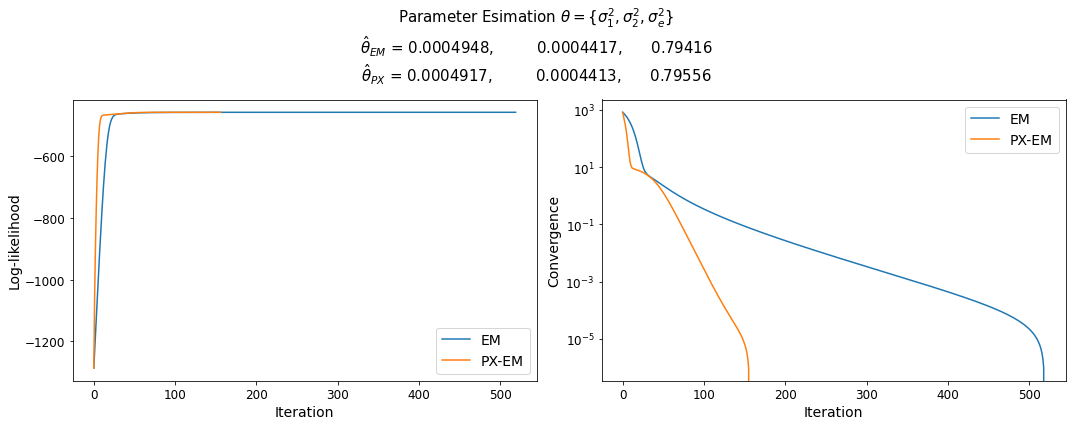

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].plot(lhs_em, label='EM')
ax[0].plot(lhs_pxem, label='PX-EM')
ax[0].legend(fontsize=14)
ax[0].set_ylabel('Log-likelihood', fontsize=14)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].tick_params(labelsize=12)

ax[1].plot(max(lhs_em)-lhs_em, label='EM')
ax[1].plot(max(lhs_pxem)-lhs_pxem, label='PX-EM')
ax[1].legend(fontsize=14)
ax[1].set_ylabel('Convergence', fontsize=14)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].set_yscale('log')

plt.suptitle('Parameter Esimation $\\theta=\{\sigma_1^2, \sigma_2^2, \sigma_e^2\}$\n'
             +'$\hat{\\theta}_{EM}$ = '+f'{np.round(1/a_em, 7)},\t {np.round(1/b_em, 7)},\t {np.round(1/c_em, 5)}' + '\n' 
             +'$\hat{\\theta}_{PX}$ = '+f'{np.round(1/a_pxem, 7)},\t {np.round(1/b_pxem, 7)},\t {np.round(1/c_pxem, 7)}',
             fontsize=15)
fig.tight_layout()
plt.show()

In above figure, we can see PX-EM achieves over three times acceleration. But the solution seems a little bit strange, because the variance of the noise is too large compared to the fixed effect. 

Note that EM is solving a non-convex optimization. Although the log-likelihood increases with the iterations, there is no guarantee that EM will converge to the global optimal one. Seems that above solution is a local optimum.

Now we try different initial point to achieve better result.

In [5]:
model = VCM3(X1, X2, y)
a_em, b_em, c_em, lhs_em = model.solve_em(200, 100, 100, 500)
a_pxem, b_pxem, c_pxem, lhs_pxem = model.solve_pxem(200, 100, 100, 500)

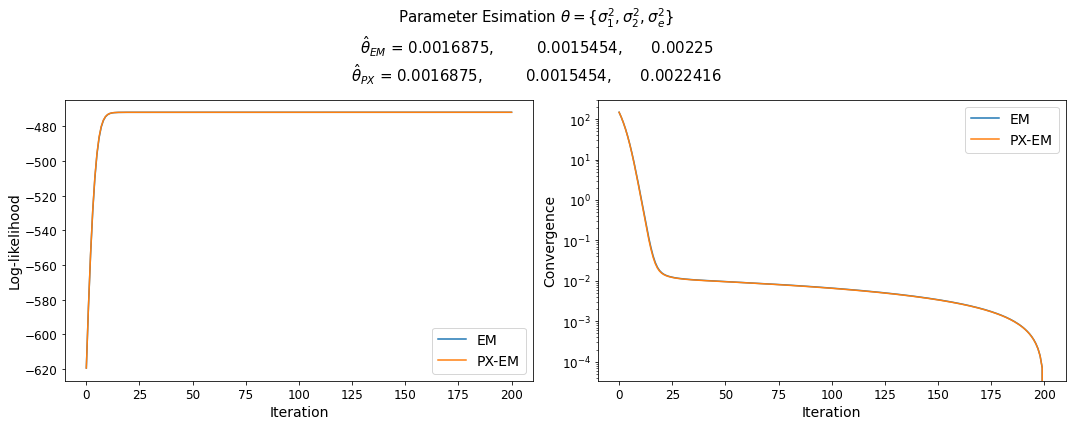

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].plot(lhs_em, label='EM')
ax[0].plot(lhs_pxem, label='PX-EM')
ax[0].legend(fontsize=14)
ax[0].set_ylabel('Log-likelihood', fontsize=14)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].tick_params(labelsize=12)

ax[1].plot(max(lhs_em)-lhs_em, label='EM')
ax[1].plot(max(lhs_pxem)-lhs_pxem, label='PX-EM')
ax[1].legend(fontsize=14)
ax[1].set_ylabel('Convergence', fontsize=14)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].set_yscale('log')

plt.suptitle('Parameter Esimation $\\theta=\{\sigma_1^2, \sigma_2^2, \sigma_e^2\}$\n'
             +'$\hat{\\theta}_{EM}$ = '+f'{np.round(1/a_em, 7)},\t {np.round(1/b_em, 7)},\t {np.round(1/c_em, 5)}' + '\n' 
             +'$\hat{\\theta}_{PX}$ = '+f'{np.round(1/a_pxem, 7)},\t {np.round(1/b_pxem, 7)},\t {np.round(1/c_pxem, 7)}',
             fontsize=15)
fig.tight_layout()
plt.show()

It achieves higher loglikelihood, the parameter estimation is better.

However, as we can see, two curves overlap almostly. PX-EM doesn't provide any significant acceleration. I guess, if the algorithm is given a relatively good initial parameter estimation, we cannot expect too much acceleration.

Let's try more initial point for fun.

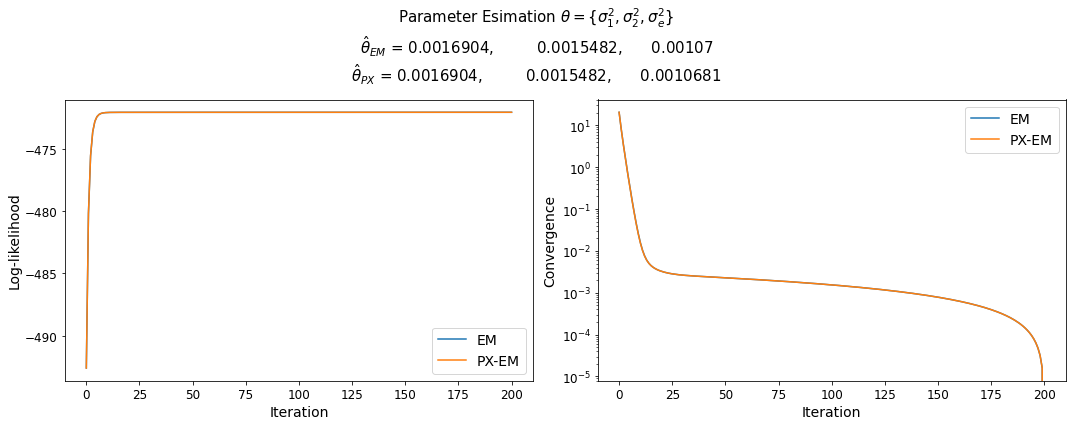

In [ ]:
model = VCM3(X1, X2, y)
a_em, b_em, c_em, lhs_em = model.solve_em(200, 1000, 1000, 1000)
a_pxem, b_pxem, c_pxem, lhs_pxem = model.solve_pxem(200, 1000, 1000, 1000)
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].plot(lhs_em, label='EM')
ax[0].plot(lhs_pxem, label='PX-EM')
ax[0].legend(fontsize=14)
ax[0].set_ylabel('Log-likelihood', fontsize=14)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].tick_params(labelsize=12)

ax[1].plot(max(lhs_em)-lhs_em, label='EM')
ax[1].plot(max(lhs_pxem)-lhs_pxem, label='PX-EM')
ax[1].legend(fontsize=14)
ax[1].set_ylabel('Convergence', fontsize=14)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].set_yscale('log')

plt.suptitle('Parameter Esimation $\\theta=\{\sigma_1^2, \sigma_2^2, \sigma_e^2\}$\n'
             +'$\hat{\\theta}_{EM}$ = '+f'{np.round(1/a_em, 7)},\t {np.round(1/b_em, 7)},\t {np.round(1/c_em, 5)}' + '\n' 
             +'$\hat{\\theta}_{PX}$ = '+f'{np.round(1/a_pxem, 7)},\t {np.round(1/b_pxem, 7)},\t {np.round(1/c_pxem, 7)}',
             fontsize=15)
fig.tight_layout()
plt.show()